In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import set_printoptions
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix

import keras
#from keras.optimizers import SGD
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import xgboost
import lightgbm as lgb
from sklearn.metrics import roc_auc_score


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
#from keras.optimizers import RMSprop

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('Dataset of Diabetes .csv')

In [3]:
df1.head(20)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721,34225,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421,34227,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,M,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759,34230,F,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


In [4]:
df1.shape

(1000, 14)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df1.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [7]:
print(df1['Gender'].value_counts())
print(df1['CLASS'].value_counts())

M    565
F    434
f      1
Name: Gender, dtype: int64
Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64


In [8]:
df1.isnull().sum()


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df1.nunique()

ID           800
No_Pation    961
Gender         3
AGE           50
Urea         110
Cr           113
HbA1c        111
Chol          77
TG            69
HDL           48
LDL           65
VLDL          60
BMI           64
CLASS          5
dtype: int64

# Dealing with Categorical Features

> Indented block



    Since our dataset has an object feature 'Gender', i would be encoding it to a numerical feature and then can care of the one instance misinterpeted by 'f' instead of the upper case 'F' as in Female.

    I will also be taking care of 'CLASS' feature as it is categorical, i would be encoding it to a numerical feature, without the use of a label encoder tho, i will be doing it with just the simple .replace( function

In [11]:
df2 = df1.copy()

In [12]:
df2['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [13]:
df2.iloc[:,2] = df2['Gender'].replace(('F', 'f', 'M'), (0,0,1))
df2.iloc[:,13] = df2['CLASS'].replace(('N', 'N ', 'P', 'Y', 'Y '), (0, 0, 1, 2, 2))

In [14]:
for col in df2.columns.to_list():
  print(pd.DataFrame(df2.groupby('CLASS')[col].mean()))

               ID
CLASS            
0      368.252427
1      396.056604
2      333.624408
           No_Pation
CLASS               
0      815851.990291
1       64299.037736
2      216955.928910
         Gender
CLASS          
0      0.378641
1      0.679245
2      0.580569
             AGE
CLASS           
0      44.233010
1      43.283019
2      55.305687
           Urea
CLASS          
0      4.680583
1      4.511321
2      5.217468
              Cr
CLASS           
0      62.796117
1      66.075472
2      69.873223
          HbA1c
CLASS          
0      4.560194
1      6.003774
2      8.878270
           Chol
CLASS          
0      4.268932
1      4.579245
2      4.953104
             TG
CLASS          
0      1.625243
1      2.126415
2      2.452026
            HDL
CLASS          
0      1.227184
1      1.127358
2      1.206872
            LDL
CLASS          
0      2.625243
1      2.493396
2      2.615213
           VLDL
CLASS          
0      0.943689
1      0.983019
2      2.02

In [15]:
pd.DataFrame(df2['Gender'].value_counts(normalize= True)*100.0)

,Gender
1,56.5
0,43.5


In [16]:
pd.DataFrame(df2.groupby(['CLASS', 'Gender'])['No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', ].mean())

No_Pation        AGE      Urea         Cr     HbA1c  \
CLASS Gender                                                           
0     0       7.703864e+04  43.984375  4.384375  57.921875  4.501563   
      1       2.028264e+06  44.641026  5.166667  70.794872  4.656410   
1     0       7.756282e+04  41.470588  3.876471  49.588235  6.058824   
      1       5.803558e+04  44.138889  4.811111  73.861111  5.977778   
2     0       6.969927e+04  55.567797  4.840678  58.861582  9.104407   
      1       3.233414e+05  55.116327  5.489680  77.828571  8.714898   

                  Chol        TG       HDL       LDL      VLDL        BMI  
CLASS Gender                                                               
0     0       4.350000  1.484375  1.326563  2.587500  0.690625  22.507812  
      1       4.135897  1.856410  1.064103  2.687179  1.358974  22.156410  
1     0       4.747059  1.876471  1.179412  2.655882  0.982353  24.176471  
      1       4.500000  2.244444  1.102778  2.416667  0.983333  23.819444  
2     0       5.079096  2.426554  1.304237  2.526441  1.111582  30.614859  
      1       4.862082  2.470429  1.136531  2.679347  2.677347  30.953592

# Class:
0 = Not Diabetic

1 = Prone to Diabetes

2 = Diabetic

# Gender :
0 = Female

1= Male

In [ ]:
df2.hist(bins=70, figsize=(20,12))
plt.style.use('seaborn-darkgrid')
plt.title(col)
plt.show()


In [18]:
df2['Age_group'] = pd.cut(df1['AGE'], bins = [20., 30, 40, 50, 60, 70., np.inf], \
                          labels =['below_30yrs', 'below_40yrs', 'below_50yrs', 'below_60yrs', 'below_70yrs', 'below_80yrs'] )

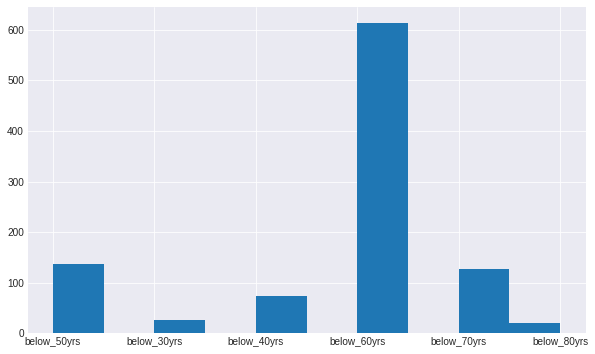

In [19]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-darkgrid')
df2['Age_group'].hist()


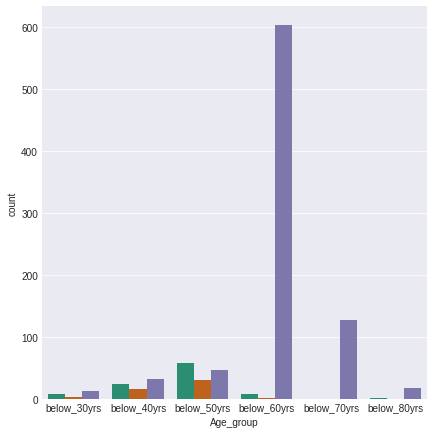

In [20]:
try:
  sns.catplot(data= df2, x=df2['Age_group'], hue = 'CLASS', kind = 'count', legend = True , palette ='Dark2', height =6)
  plt.style.use('seaborn-darkgrid')
  plt.legend()
except: 
  "ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()."
    

In [21]:
df2.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS', 'Age_group'],
      dtype='object')

In [22]:
df2.drop(['ID', 'Age_group'], axis = 1, inplace= True)

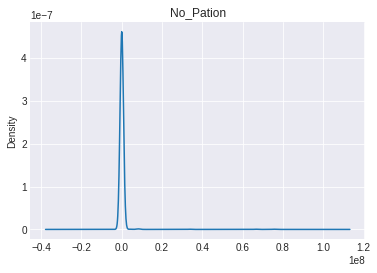

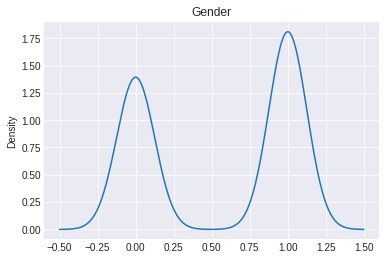

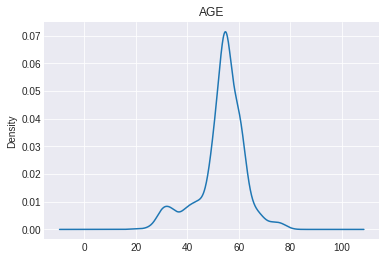

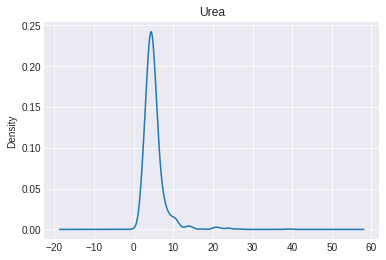

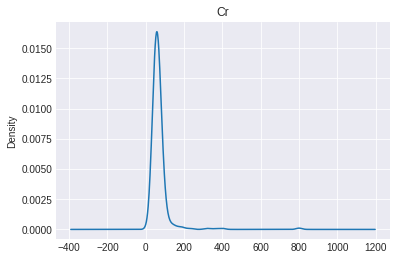

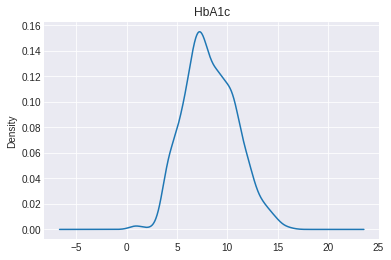

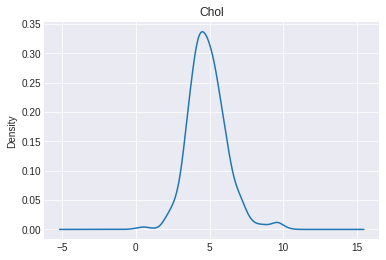

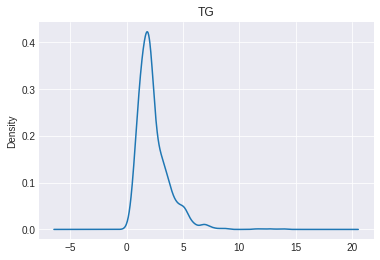

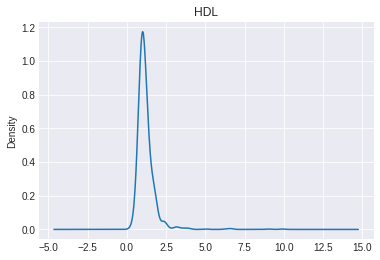

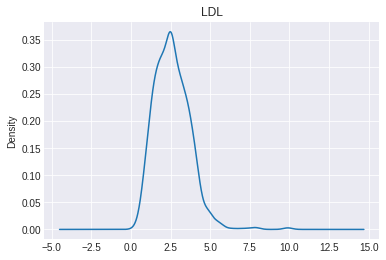

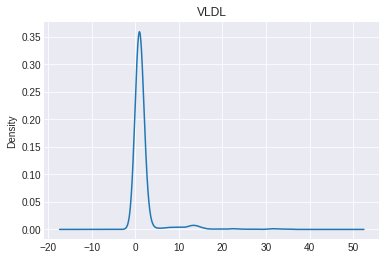

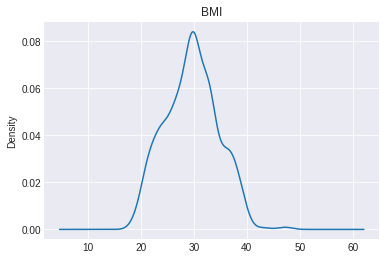

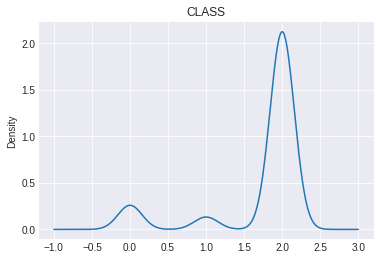

In [23]:
for col in df2.columns.to_list():
  plt.style.use('seaborn-darkgrid')
  df2[col].plot(kind= 'density')
  plt.title(col)
  plt.show()



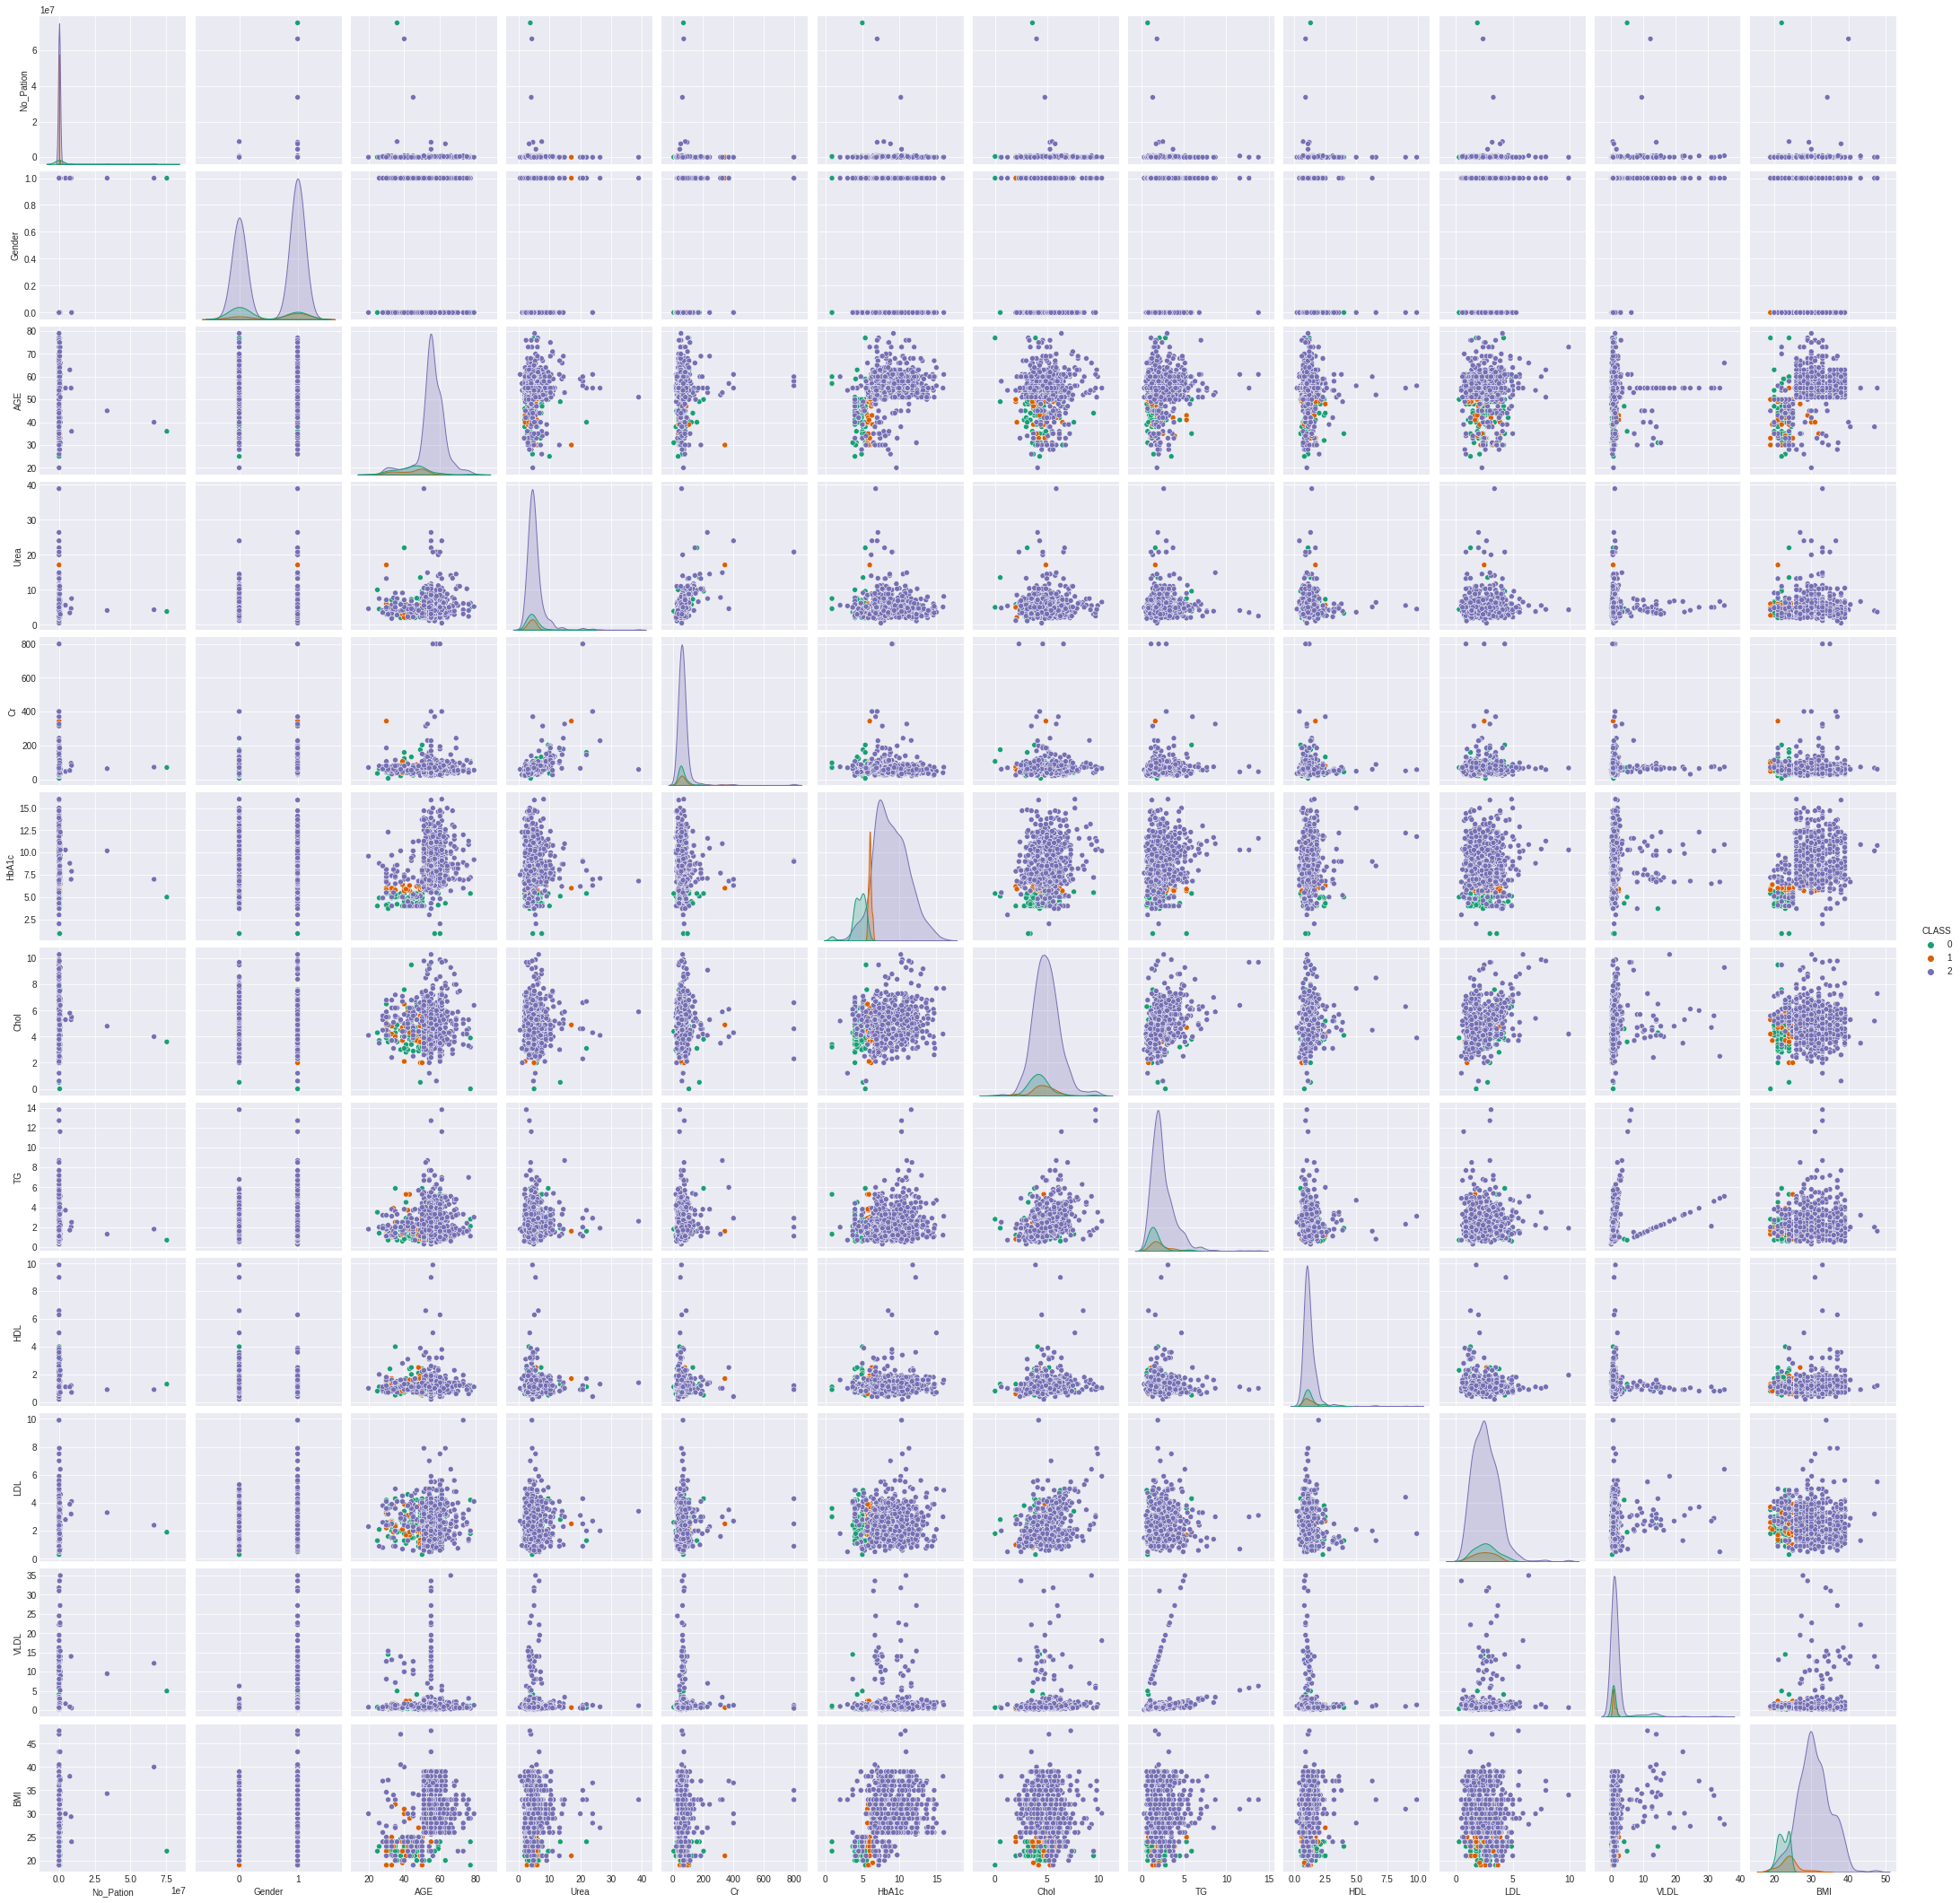

In [24]:
sns.pairplot(df2, hue = 'CLASS', palette ='Dark2')
plt.show()

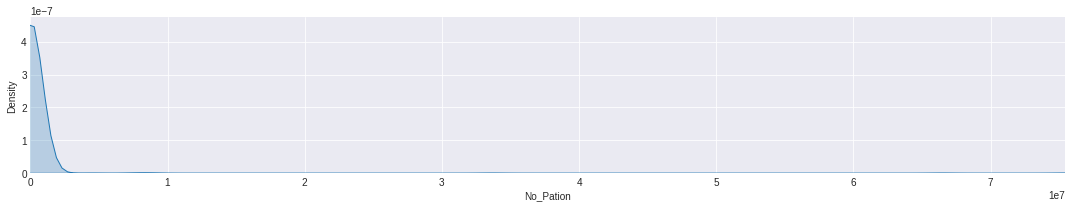

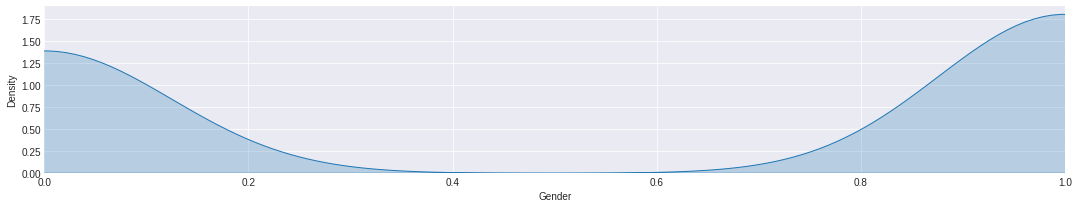

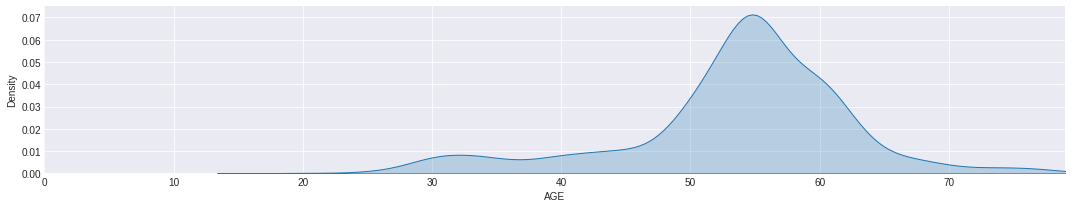

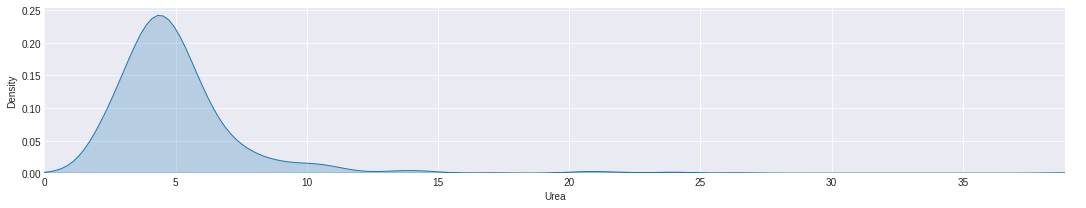

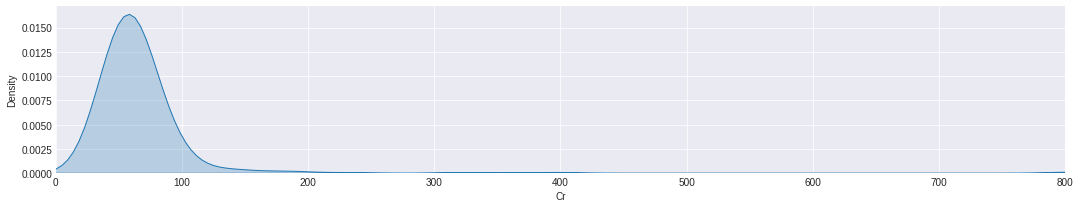

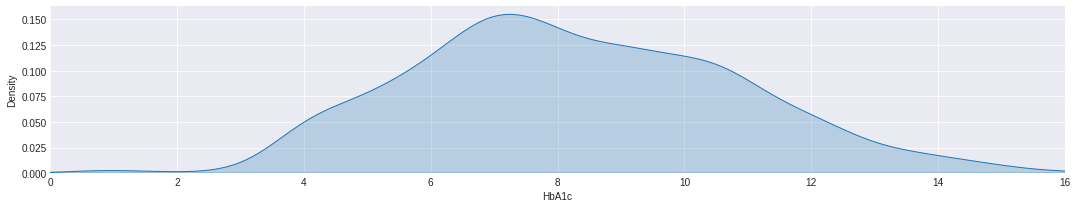

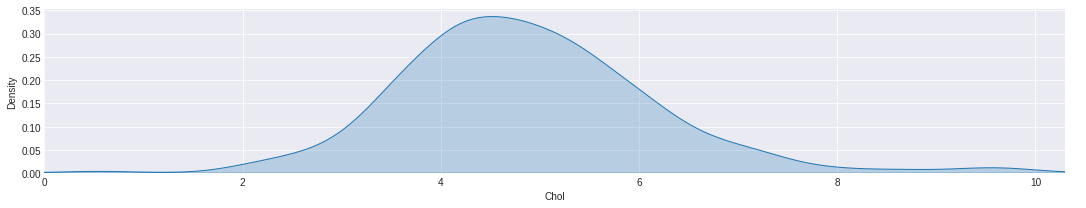

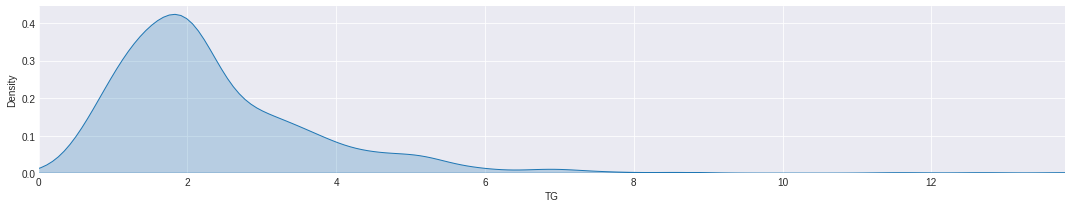

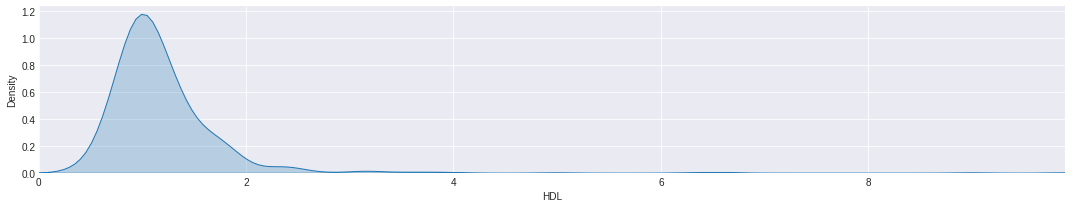

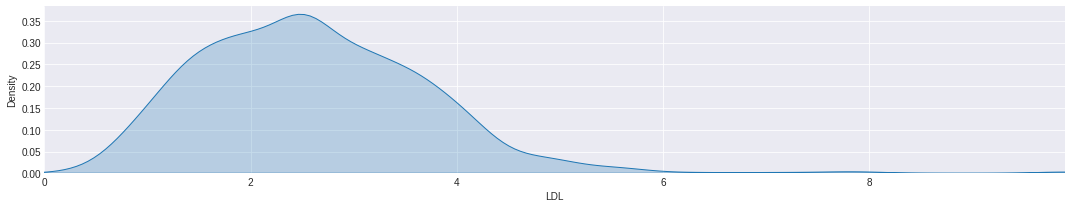

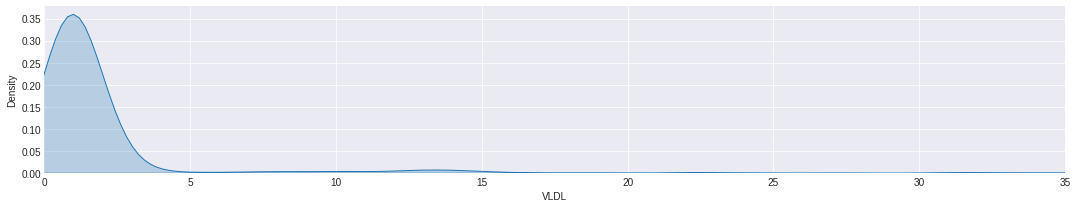

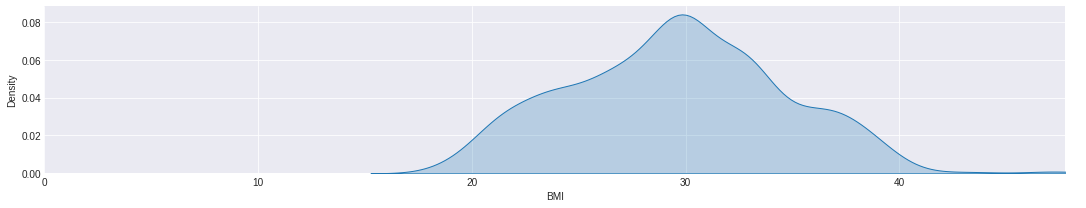

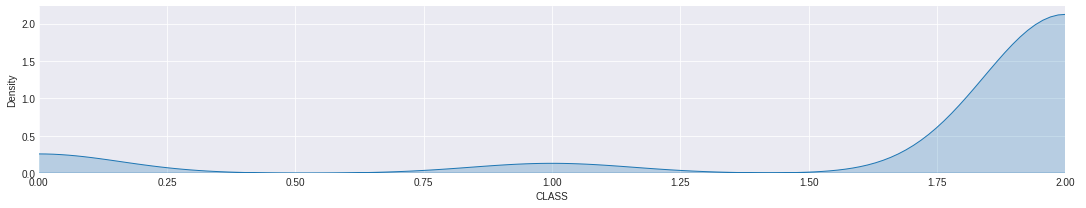

In [25]:
for col3 in df2.columns.to_list():
    fig1 = sns.FacetGrid(df2 , aspect = 5)
    fig1.map(sns.kdeplot, col3, shade = True)
    max= df2[col3].max()
    fig1.set(xlim=(0,max))
    fig1.add_legend()

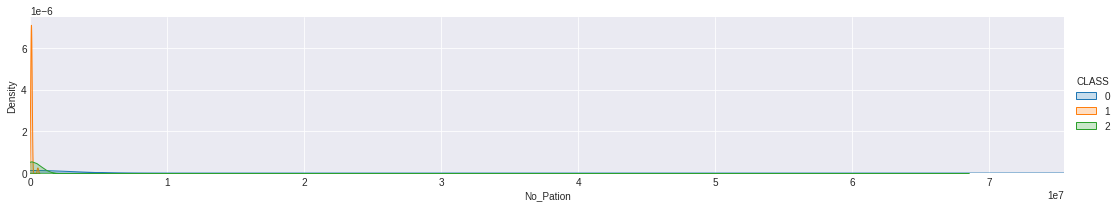

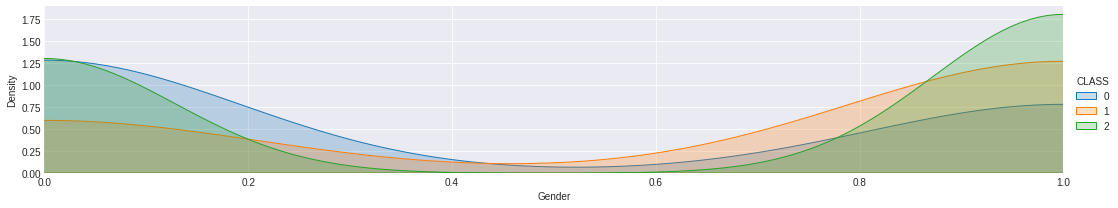

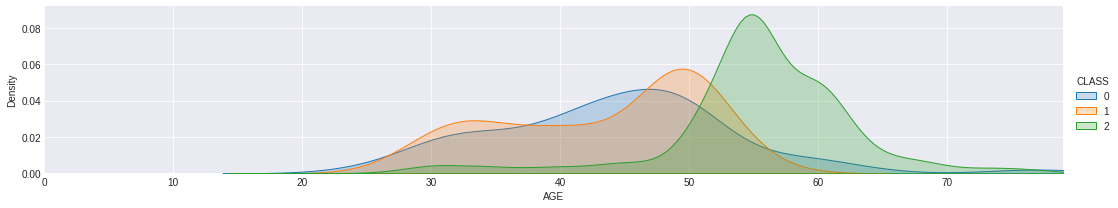

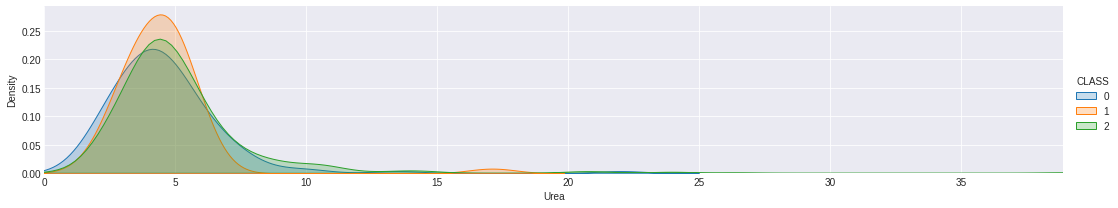

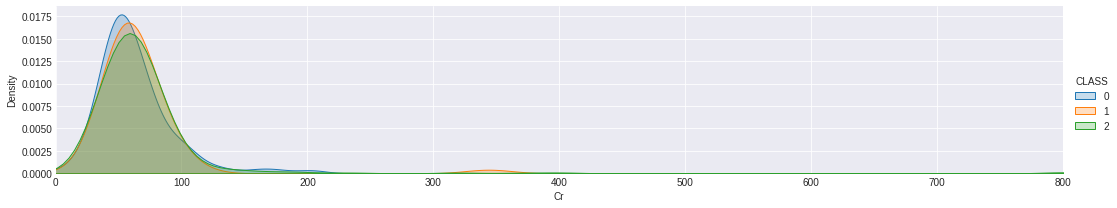

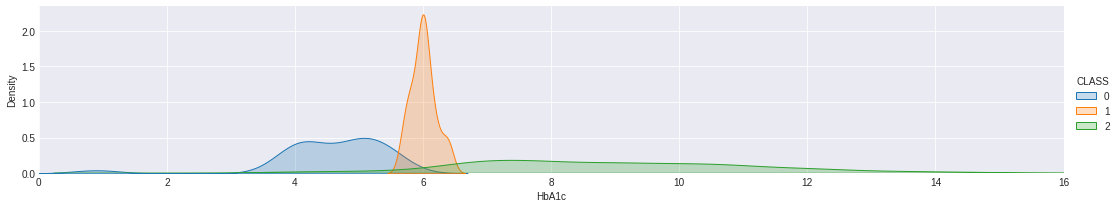

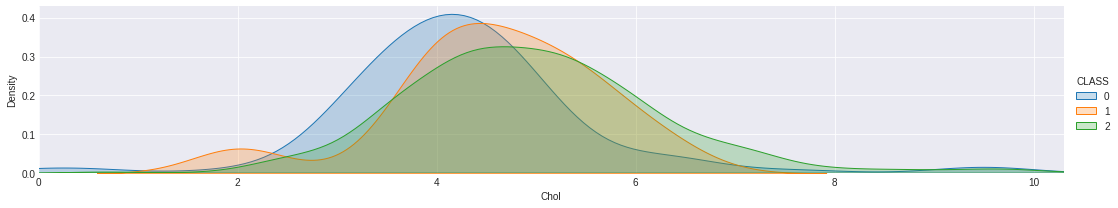

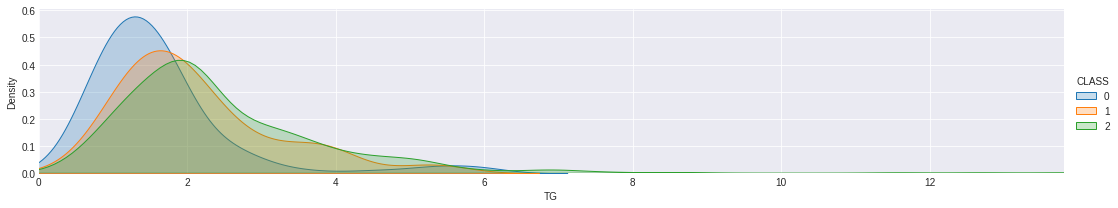

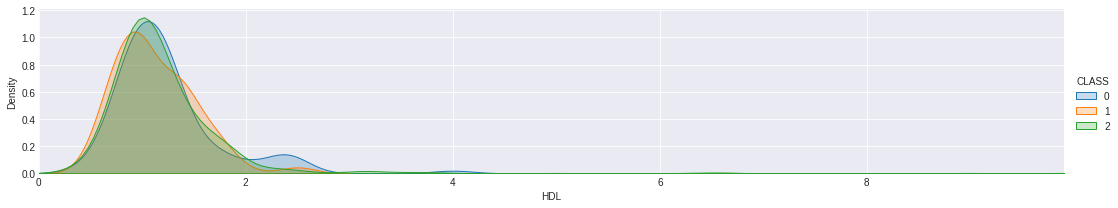

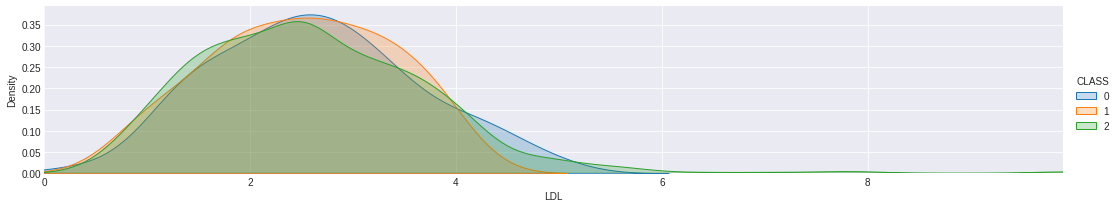

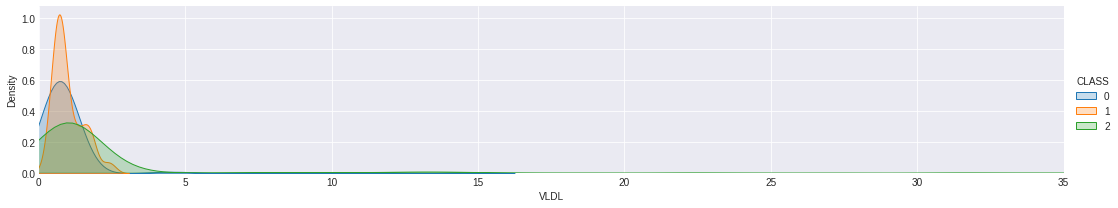

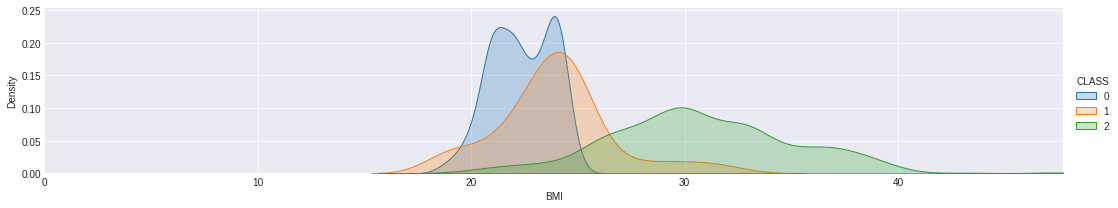

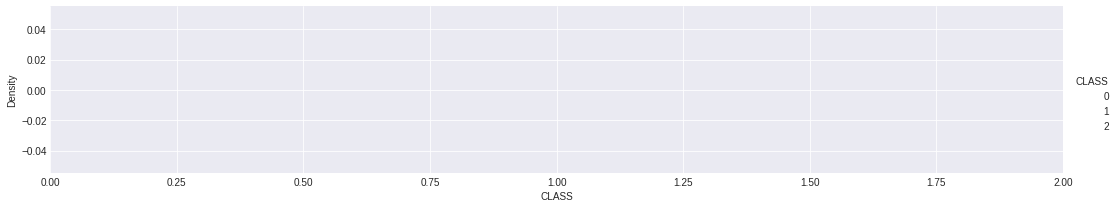

In [26]:
for col3 in df2.columns.to_list():
    fig1 = sns.FacetGrid(df2 , hue = 'CLASS',aspect = 5)
    fig1.map(sns.kdeplot, col3, shade = True)
    max= df2[col3].max()
    fig1.set(xlim=(0,max))
    fig1.add_legend()
    

# Bivariate Analysis 

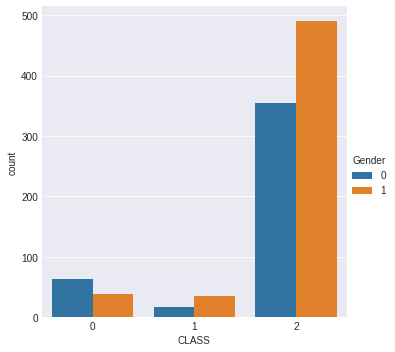

In [27]:
sns.catplot('CLASS',data= df2,hue='Gender',kind = "count")
plt.style.use('seaborn-whitegrid')

In [28]:
X = df2.copy()
Y = X.pop('CLASS')

In [29]:
X

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [30]:
discrete_features = X.dtypes == int

In [31]:
discrete_features.dtypes

dtype('bool')

In [32]:
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores  # show a few features with their MI scores

No_Pation    0.516944
HbA1c        0.396527
BMI          0.285267
AGE          0.261041
Cr           0.152571
Chol         0.070508
VLDL         0.059987
LDL          0.057436
TG           0.046521
HDL          0.045397
Urea         0.028726
Gender       0.009078
Name: MI Scores, dtype: float64

### A barh plot to show the Mutual information scores

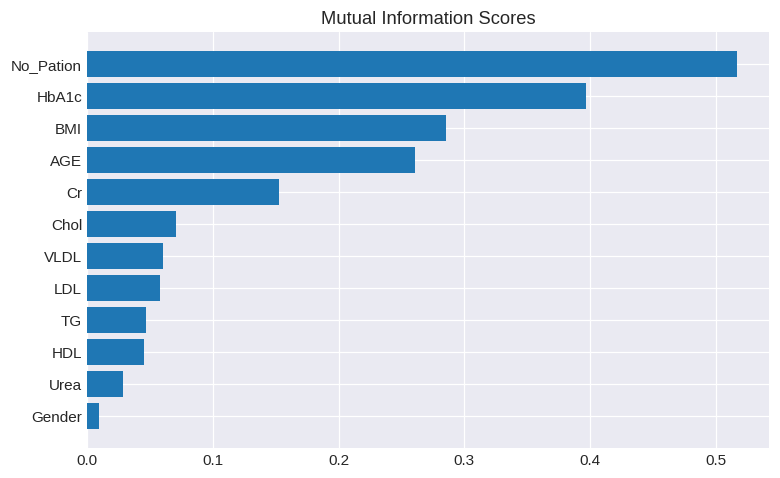

In [50]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.style.use('seaborn-darkgrid')
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    

plt.figure(dpi=110, figsize=(8, 5))
plot_mi_scores(mi_scores)


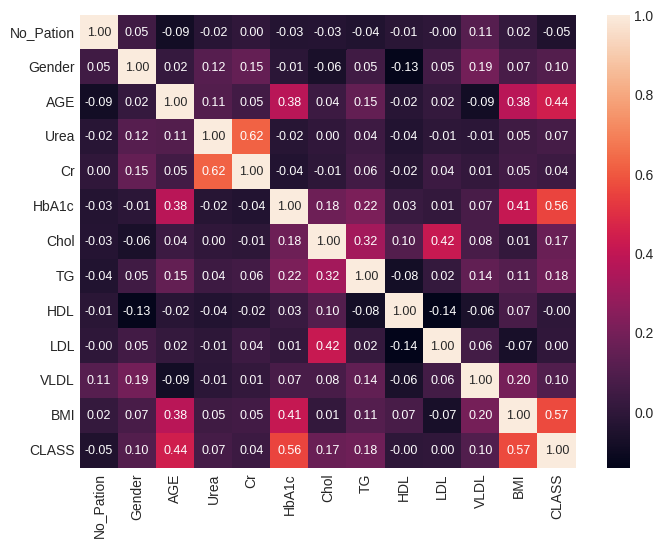

In [34]:
plt.figure(dpi = 100, figsize= (8,6))
sns.heatmap(df2.corr(), cbar=True, annot=True, fmt='.2f', annot_kws={'size': 9})

plt.show()

In [35]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled_df1 = minmaxscaler.fit_transform(X)
scaledx1 = pd.DataFrame(scaled_df1).values

In [36]:
scaler = StandardScaler()
rescaled_df1 = scaler.fit_transform(scaledx1)
RescaledX1 = pd.DataFrame(rescaled_df1).values

In [37]:
normalizer = Normalizer()
normalized_df3 = normalizer.fit_transform(RescaledX1)
Normalizedx1 = pd.DataFrame(normalized_df3, columns = X.columns)

In [38]:
Normalizedx1.head(3)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.022954,-0.349972,-0.123184,-0.044460,-0.117511,-0.409949,-0.156438,-0.317855,0.556050,-0.333324,-0.113607,-0.345351
1,-0.017605,0.220871,-0.787891,-0.053605,-0.029150,-0.336043,-0.224970,-0.170683,-0.039946,-0.115137,-0.086252,-0.333842
2,-0.020228,-0.349993,-0.123191,-0.044462,-0.117518,-0.409973,-0.156448,-0.317874,0.556083,-0.333344,-0.113614,-0.345371


In [39]:
df3 = Normalizedx1

In [40]:
df3

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.022954,-0.349972,-0.123184,-0.044460,-0.117511,-0.409949,-0.156438,-0.317855,0.556050,-0.333324,-0.113607,-0.345351
1,-0.017605,0.220871,-0.787891,-0.053605,-0.029150,-0.336043,-0.224970,-0.170683,-0.039946,-0.115137,-0.086252,-0.333842
2,-0.020228,-0.349993,-0.123191,-0.044462,-0.117518,-0.409973,-0.156448,-0.317874,0.556083,-0.333344,-0.113614,-0.345371
3,-0.016623,-0.350016,-0.123199,-0.044465,-0.117526,-0.410000,-0.156458,-0.317895,0.556120,-0.333366,-0.113622,-0.345394
4,-0.019136,0.240072,-0.638617,0.184217,-0.104700,-0.365256,0.007819,-0.263666,-0.167768,-0.149694,-0.108694,-0.473189
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.014441,0.233004,0.527543,0.531808,0.124268,-0.134325,0.538241,-0.123174,-0.001911,-0.192938,-0.090990,0.022592
996,0.034230,0.167480,-0.488920,-0.138240,-0.028471,0.302868,-0.111907,-0.020391,-0.145955,-0.035928,0.706059,0.293317
997,-0.014960,0.242520,-0.739409,0.186095,0.055583,-0.172549,-0.162048,-0.246619,-0.001989,-0.052025,0.471401,-0.121371
998,-0.015993,0.192326,-0.386995,0.050451,-0.036351,-0.136837,0.073650,-0.054718,0.131248,0.057073,0.727002,0.482665


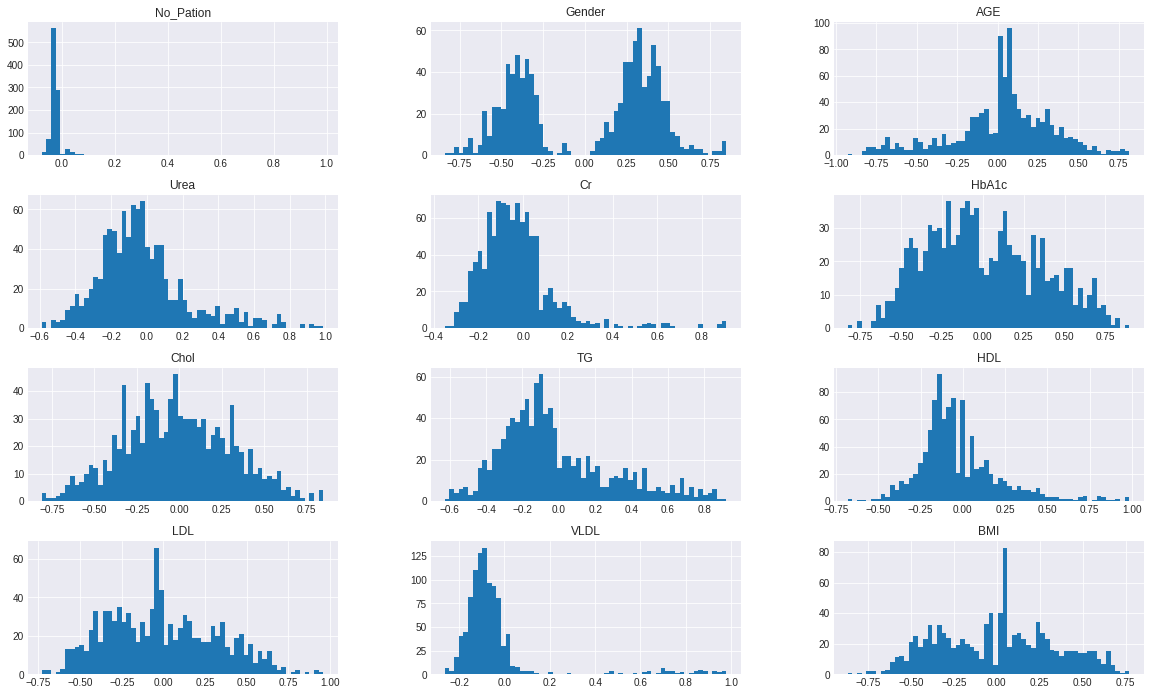

In [51]:
df3.hist(bins = 60, figsize =(20,12))
plt.show()


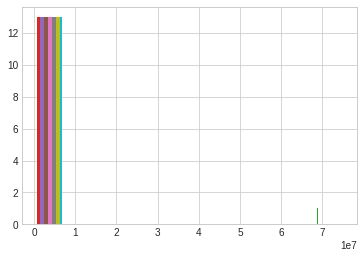

In [45]:
plt.hist(df2)
plt.show()

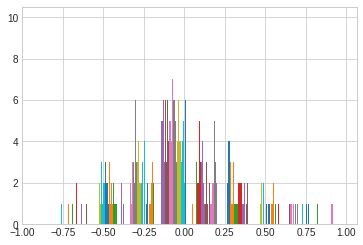

In [44]:
plt.hist(Normalizedx1)
plt.show()

In [43]:
Y.value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

In [52]:
X2 = df3

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = .20,  random_state = 4)

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [56]:
X_smote, Y_smote = smote.fit_resample(X2, Y)

In [55]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [57]:
Y_train_smote.value_counts()

2    676
1    676
0    676
Name: CLASS, dtype: int64

In [70]:
k = 3
kf = KFold(n_splits= k, random_state = 14 ,shuffle = True)

In [79]:
polynomial_linearRegression = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LogisticRegression(max_iter= 1000))])

In [80]:
polynomial_linearRegression.fit(X_train_smote, Y_train_smote)
result = polynomial_linearRegression.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 90.0


In [81]:
linreg_result = cross_val_score(polynomial_linearRegression, X_train_smote, Y_train_smote, cv=6)
print('The results are---',linreg_result*100.0)
print('The mean accuracy of the 6 results is---', linreg_result.mean()*100.0)
print('The standard deviation of the results is ---',linreg_result.std()*100.0)



The results are--- [92.01183432 92.89940828 95.85798817 94.37869822 93.78698225 92.89940828]
The mean accuracy of the 6 results is--- 93.63905325443787
The standard deviation of the results is --- 1.2406060774565217


In [82]:

linreg_result2 = cross_val_predict(polynomial_linearRegression, X_smote, Y_smote, cv=kf)

In [83]:
print(confusion_matrix(Y_smote, linreg_result2))
print(classification_report(Y_smote, linreg_result2))

[[754  80  10]
 [ 20 821   3]
 [ 28  40 776]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       844
           1       0.87      0.97      0.92       844
           2       0.98      0.92      0.95       844

    accuracy                           0.93      2532
   macro avg       0.93      0.93      0.93      2532
weighted avg       0.93      0.93      0.93      2532



In [84]:
polynomial_RandomForest = Pipeline([
("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
("clf", RandomForestClassifier(n_estimators = 7, n_jobs = -1 ))])

In [91]:
polynomial_RandomForest.fit(X_train_smote, Y_train_smote)
result = polynomial_RandomForest.score(X_test, Y_test)
print('Accuracy: {}'.format(result*100.0))

Accuracy: 94.0


In [97]:
randomforest_result = cross_val_score(polynomial_RandomForest, X_smote, Y_smote, cv=6)
print('The results are ---', randomforest_result*100.0)
print('The mean accuracy of the 6 results is ---', randomforest_result.mean()*100.0)
print('The standard deviation of the results is --- ', randomforest_result.std()*100.0)

The results are --- [ 89.81042654  98.34123223 100.          99.76303318 100.
  97.1563981 ]
The mean accuracy of the 6 results is --- 97.51184834123224
The standard deviation of the results is ---  3.5957324420600756


In [98]:
randomforest_result2 = cross_val_predict(polynomial_RandomForest, X_smote, Y_smote, cv=kf)

In [100]:
print(confusion_matrix(Y_smote, randomforest_result2))
print(classification_report(Y_smote, randomforest_result2))

[[837   1   6]
 [  2 840   2]
 [ 25  11 808]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       844
           1       0.99      1.00      0.99       844
           2       0.99      0.96      0.97       844

    accuracy                           0.98      2532
   macro avg       0.98      0.98      0.98      2532
weighted avg       0.98      0.98      0.98      2532



In [116]:
poly_kernel_svc_clf = Pipeline([
("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C=10))
])
poly_kernel_svm_clf.fit(X_train_smote, Y_train_smote)
svc_polyk_pred =poly_kernel_svm_clf.predict(X_test)
print('Accuracy :',metrics.accuracy_score(Y_test, svc_polyk_pred)*100.0)

Accuracy : 94.0


In [117]:
svc_polyk_result2 = cross_val_score(poly_kernel_svc_clf, X_smote, Y_smote, cv=6)
print('The results are ---', svc_polyk_result2*100.0)
print('The mean accuracy of the 6 results is ---', svc_polyk_result2.mean()*100.0)
print('The standard deviation of the results is --- ', svc_polyk_result2.std()*100.0)

The results are --- [ 90.28436019  98.81516588 100.          99.76303318  99.76303318
  95.49763033]
The mean accuracy of the 6 results is --- 97.35387045813586
The standard deviation of the results is ---  3.5158953030736275


In [118]:
svc_polyk_preds = cross_val_predict(poly_kernel_svc_clf, X_smote, Y_smote, cv=kf)

In [119]:
print(confusion_matrix(Y_smote, svc_polyk_preds))
print(classification_report(Y_smote, svc_polyk_preds))

[[844   0   0]
 [  0 844   0]
 [ 16  12 816]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       844
           1       0.99      1.00      0.99       844
           2       1.00      0.97      0.98       844

    accuracy                           0.99      2532
   macro avg       0.99      0.99      0.99      2532
weighted avg       0.99      0.99      0.99      2532



In [128]:
rbf_kernel_svc_clf = Pipeline([
("svm_clf", SVC(kernel="rbf", gamma=1.4, C=2.8))
])
rbf_kernel_svc_clf.fit(X_train_smote, Y_train_smote)
svc_rbfk_pred= rbf_kernel_svc_clf.predict(X_test)
print('Accuracy :',metrics.accuracy_score(Y_test, svc_rbfk_pred)*100.0)

Accuracy : 92.0


In [129]:
svc_rbfk_result2 = cross_val_score(rbf_kernel_svc_clf, X_smote, Y_smote, cv=6)
print('The results are ---', svc_rbfk_result2*100.0)
print('The mean accuracy of the 6 results is ---', svc_rbfk_result2.mean()*100.0)
print('The standard deviation of the results is --- ', svc_rbfk_result2.std()*100.0)

The results are --- [90.04739336 99.76303318 99.76303318 99.52606635 99.52606635 93.60189573]
The mean accuracy of the 6 results is --- 97.03791469194312
The standard deviation of the results is ---  3.827705003219078


In [130]:
svc_rbfk_preds = cross_val_predict(rbf_kernel_svc_clf, X_smote, Y_smote, cv=kf)

In [132]:
print(confusion_matrix(Y_smote, svc_rbfk_preds))
print(classification_report(Y_smote, svc_rbfk_preds))

[[834   8   2]
 [  0 844   0]
 [ 23   8 813]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       844
           1       0.98      1.00      0.99       844
           2       1.00      0.96      0.98       844

    accuracy                           0.98      2532
   macro avg       0.98      0.98      0.98      2532
weighted avg       0.98      0.98      0.98      2532



In [101]:
polynomial_lgbm = Pipeline([
("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
("lgb_model", lgb.LGBMClassifier(n_estimators = 16))])

In [ ]:
polynomial_lgbm.fit(X_train_smote, Y_train_smote)
plgb_result = polynomial_lgbm.score(X_test, Y_test)
print('Accuracy: {}'.format(plgb_result*100.0))

In [ ]:
poly_lgbm_result = cross_val_score(polynomial_lgbm, X_smote, Y_smote, cv=6)
print('The results are ---', poly_lgbm_result*100.0)
print('The mean accuracy of the 6 results is ---', poly_lgbm_result.mean()*100.0)
print('The standard deviation of the results is ---', poly_lgbm_result.std()*100.0)

In [ ]:
poly_lgbm_preds = cross_val_predict(polynomial_lgbm, X_smote, Y_smote, cv=kf)

In [ ]:
print(confusion_matrix(Y_smote, poly_lgbm_preds))
print(classification_report(Y_smote, poly_lgbm_preds))

In [120]:
svc_model = SVC(kernel = 'poly', C= 20)
svc_model.fit(X_train_smote,Y_train_smote)
svc_y_pred = svc_model.predict(X_test)
print(confusion_matrix(Y_test, svc_y_pred))
print(classification_report(Y_test, svc_y_pred))

[[ 17   0   3]
 [  4   6   2]
 [  4   2 162]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.75      0.50      0.60        12
           2       0.97      0.96      0.97       168

    accuracy                           0.93       200
   macro avg       0.80      0.77      0.77       200
weighted avg       0.93      0.93      0.92       200



In [121]:
svc_result = cross_val_score(svc_model, X_smote, Y_smote, cv=6)
print('The results are ---', svc_result*100.0)
print('The mean accuracy of the 6 results is ---', svc_result.mean()*100.0)
print('The standard deviation of the results is ---', svc_result.std()*100.0)

The results are --- [90.28436019 98.81516588 99.0521327  99.52606635 99.28909953 93.60189573]
The mean accuracy of the 6 results is --- 96.76145339652447
The standard deviation of the results is --- 3.5457149585250294


In [123]:
svc_preds = cross_val_predict(svc_model, X_smote, Y_smote, cv=kf)

In [124]:
print(confusion_matrix(Y_smote, svc_preds))
print(classification_report(Y_smote, svc_preds))

[[843   0   1]
 [  0 844   0]
 [ 17  18 809]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       844
           1       0.98      1.00      0.99       844
           2       1.00      0.96      0.98       844

    accuracy                           0.99      2532
   macro avg       0.99      0.99      0.99      2532
weighted avg       0.99      0.99      0.99      2532



In [155]:
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train_smote, Y_train_smote)
gbrt_result1 = gbrt.score(X_test, Y_test)
print('Accuracy: {}'.format(gbrt_result1*100.0))

Accuracy: 93.5


In [149]:
gbrt_result2 = cross_val_score(gbrt, X_smote, Y_smote, cv=6)
print('The results are ---', svc_result*100.0)
print('The mean accuracy of the 6 results is ---', gbrt_result2.mean()*100.0)
print('The standard deviation of the results is ---', gbrt_result2.std()*100.0)

The results are --- [90.28436019 98.81516588 99.0521327  99.52606635 99.28909953 93.60189573]
The mean accuracy of the 6 results is --- 97.94628751974724
The standard deviation of the results is --- 3.3586558650030485


In [150]:
gbrt_preds = cross_val_predict(gbrt, X_smote, Y_smote, cv=kf)

In [151]:
print(confusion_matrix(Y_smote, gbrt_preds))
print(classification_report(Y_smote, gbrt_preds))

[[840   4   0]
 [  1 843   0]
 [ 16  11 817]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       844
           1       0.98      1.00      0.99       844
           2       1.00      0.97      0.98       844

    accuracy                           0.99      2532
   macro avg       0.99      0.99      0.99      2532
weighted avg       0.99      0.99      0.99      2532



In [152]:
ada_clf = AdaBoostClassifier(
lgb.LGBMClassifier(n_estimators = 16),
algorithm="SAMME.R", learning_rate=.005)
ada_clf.fit(X_train_smote, Y_train_smote)

ada_result1 = ada_clf.score(X_test, Y_test)
print('Accuracy: {}'.format(ada_result1*100.0))

Accuracy: 96.5


In [154]:
ada_result2 = cross_val_score(ada_clf, X_smote, Y_smote, cv=6)
print('The results are ---', ada_result2*100.0)
print('The mean accuracy of the 6 results is ---', ada_result2.mean()*100.0)
print('The standard deviation of the results is ---', ada_result2.std()*100.0)

The results are --- [89.33649289 98.34123223 99.0521327  98.81516588 99.76303318 98.34123223]
The mean accuracy of the 6 results is --- 97.27488151658768
The standard deviation of the results is --- 3.582694935600825


In [157]:
ada_preds = cross_val_predict(ada_clf, X_smote, Y_smote, cv=kf)

In [158]:
print(confusion_matrix(Y_smote, ada_preds))
print(classification_report(Y_smote, ada_preds))

[[831   9   4]
 [  2 841   1]
 [ 18  16 810]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       844
           1       0.97      1.00      0.98       844
           2       0.99      0.96      0.98       844

    accuracy                           0.98      2532
   macro avg       0.98      0.98      0.98      2532
weighted avg       0.98      0.98      0.98      2532



In [160]:
xgb_class = xgboost.XGBClassifier(n_estimators = 500)
xgb_class.fit(X_train_smote, Y_train_smote)
xgb_result1 = xgb_class.score(X_test, Y_test)
print('Accuracy: {}'.format(xgb_result1*100.0))

Accuracy: 94.5


In [161]:
xgb_result2 = cross_val_score(xgb_class, X_smote, Y_smote, cv=6)
print('The results are ---', xgb_result2 *100.0)
print('The mean accuracy of the 6 results is ---', xgb_result2 .mean()*100.0)
print('The standard deviation of the results is ---', xgb_result2 .std()*100.0)

The results are --- [ 90.52132701  99.52606635 100.         100.         100.
  98.57819905]
The mean accuracy of the 6 results is --- 98.1042654028436
The standard deviation of the results is --- 3.4285204445830484


In [162]:
xgb_pred = cross_val_predict(xgb_class, X_smote, Y_smote, cv=kf)

In [163]:
print(classification_report(Y_smote, xgb_pred))
print(confusion_matrix(Y_smote, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       844
           1       0.99      1.00      0.99       844
           2       1.00      0.97      0.99       844

    accuracy                           0.99      2532
   macro avg       0.99      0.99      0.99      2532
weighted avg       0.99      0.99      0.99      2532

[[842   0   2]
 [  0 844   0]
 [ 13  10 821]]


In [164]:
lgb_model = lgb.LGBMClassifier(n_estimators = 16)
lgb_model.fit(X_train_smote, Y_train_smote)
lgb_result1 = lgb_model.score(X_test, Y_test)
print('Accuracy: {}'.format(lgb_result1*100.0))

Accuracy: 96.0


In [165]:
lgb_result2 = cross_val_score(lgb_model, X_smote, Y_smote, cv=6)
print('The results are ---', lgb_result2 *100.0)
print('The mean accuracy of the 6 results is ---', lgb_result2 .mean()*100.0)
print('The standard deviation of the results is ---', lgb_result2 .std()*100.0)

The results are --- [89.09952607 98.34123223 98.57819905 98.81516588 99.76303318 98.34123223]
The mean accuracy of the 6 results is --- 97.1563981042654
The standard deviation of the results is --- 3.6352080565572993


In [167]:
lgb_pred = cross_val_predict(lgb_model, X_smote, Y_smote, cv=kf)

In [169]:
print(confusion_matrix(Y_smote, lgb_pred))
print(classification_report(Y_smote, lgb_pred))

[[828  12   4]
 [  2 841   1]
 [ 19  19 806]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       844
           1       0.96      1.00      0.98       844
           2       0.99      0.95      0.97       844

    accuracy                           0.98      2532
   macro avg       0.98      0.98      0.98      2532
weighted avg       0.98      0.98      0.98      2532



In [174]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder()

In [175]:
model = Sequential()

In [176]:
model.add(Dense(12, input_dim= 12))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'relu',  use_bias = False))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(3, activation = 'softmax',))

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                120       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 batch_normalization_2 (Batc  (None, 5)                2

In [179]:
Y_train_smote_dummy=pd.get_dummies(Y_train_smote)

In [183]:
Y_test_dummy = pd.get_dummies(Y_test)

In [184]:
Y_test_dummy.shape

(200, 3)

In [185]:
learning_rate = 0.001
weight_decay = 1e-6
momentum = 0.9

In [186]:
sgd = keras.optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, nesterov=True)

In [187]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30,
restore_best_weights=True)

In [188]:
model.compile(loss="categorical_crossentropy", optimizer= sgd, metrics=["accuracy"])

In [190]:
history = model.fit(X_train_smote, Y_train_smote_dummy, epochs=300, validation_data=(X_test, Y_test_dummy), callbacks = early_stopping_cb)


Epoch 1/300
64/64 [==============================] - 3s 12ms/step - loss: 1.1462 - accuracy: 0.3999 - val_loss: 1.1021 - val_accuracy: 0.3300
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 1.1301 - accuracy: 0.4152 - val_loss: 1.0962 - val_accuracy: 0.3450
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 1.1134 - accuracy: 0.4034 - val_loss: 1.1016 - val_accuracy: 0.3300
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 1.1021 - accuracy: 0.4315 - val_loss: 1.1122 - val_accuracy: 0.3400
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.4236 - val_loss: 1.1139 - val_accuracy: 0.3200
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.4300 - val_loss: 1.1091 - val_accuracy: 0.3200
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 1.0741 - accuracy: 0.4418 - val_loss: 1.0996 - val_accuracy: 0.3200
Epoch 8/300


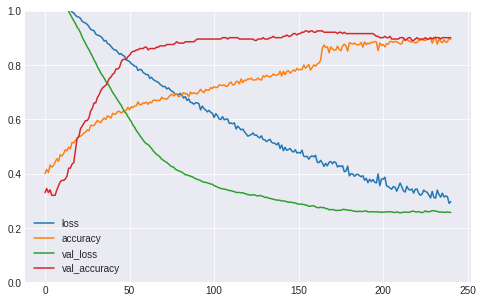

In [192]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
